In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree

In [17]:
data=pd.read_csv('iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [18]:
x=data.iloc[:,:4]
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y=data.iloc[:,-1]
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.20)

In [21]:
x_train.head()

,sepal.length,sepal.width,petal.length,petal.width
92,5.8,2.6,4.0,1.2
6,4.6,3.4,1.4,0.3
81,5.5,2.4,3.7,1.0
69,5.6,2.5,3.9,1.1
102,7.1,3.0,5.9,2.1


In [22]:
x_test.head()

,sepal.length,sepal.width,petal.length,petal.width
35,5.0,3.2,1.2,0.2
66,5.6,3.0,4.5,1.5
65,6.7,3.1,4.4,1.4
135,7.7,3.0,6.1,2.3
85,6.0,3.4,4.5,1.6


In [23]:
y_train.head()

92     Versicolor
6          Setosa
81     Versicolor
69     Versicolor
102     Virginica
Name: variety, dtype: object

In [24]:
y_test.head()

35         Setosa
66     Versicolor
65     Versicolor
135     Virginica
85     Versicolor
Name: variety, dtype: object

In [25]:
classifier=DecisionTreeClassifier()

In [26]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred=classifier.predict(x_test)
y_pred

array(['Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Versicolor', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Versicolor', 'Virginica', 'Setosa', 'Ver

In [28]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[41,  0,  0],
       [ 0, 33,  6],
       [ 0,  1, 39]], dtype=int64)

In [29]:
ac=accuracy_score(y_test,y_pred)
ac

0.9416666666666667

[Text(0.6, 0.8333333333333334, 'X[2] <= 4.75\ngini = 0.664\nsamples = 30\nvalue = [9, 11, 10]'),
 Text(0.4, 0.5, 'X[3] <= 0.65\ngini = 0.495\nsamples = 20\nvalue = [9, 11, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10]')]

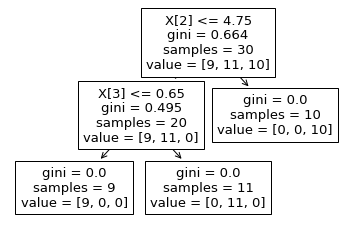

In [30]:
tree.plot_tree(classifier)